In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, Activation, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy


In [4]:
input_shape = data.shape[1:] # (50,50,1)
model = Sequential()
model.add(Input(shape=input_shape))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, input_dim=128, activation='softmax'))
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2)

In [6]:
epochs = 20
batch_size=32

In [7]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1 )

Epoch 1/20
43/43 [==============================] - 13s 279ms/step - loss: 0.5812 - accuracy: 0.7053 - val_loss: 0.4779 - val_accuracy: 0.7124
Epoch 2/20
43/43 [==============================] - 12s 272ms/step - loss: 0.4313 - accuracy: 0.7746 - val_loss: 0.2872 - val_accuracy: 0.9216
Epoch 3/20
43/43 [==============================] - 12s 272ms/step - loss: 0.2954 - accuracy: 0.8862 - val_loss: 0.1853 - val_accuracy: 0.9477
Epoch 4/20
43/43 [==============================] - 12s 285ms/step - loss: 0.1893 - accuracy: 0.9402 - val_loss: 0.1095 - val_accuracy: 0.9608
Epoch 5/20
43/43 [==============================] - 13s 309ms/step - loss: 0.1466 - accuracy: 0.9453 - val_loss: 0.0848 - val_accuracy: 0.9673
Epoch 6/20
43/43 [==============================] - 15s 341ms/step - loss: 0.1123 - accuracy: 0.9635 - val_loss: 0.0648 - val_accuracy: 0.9739
Epoch 7/20
43/43 [==============================] - 16s 366ms/step - loss: 0.1093 - accuracy: 0.9672 - val_loss: 0.0623 - val_accuracy: 0.9804

In [8]:
from matplotlib import pyplot as plt


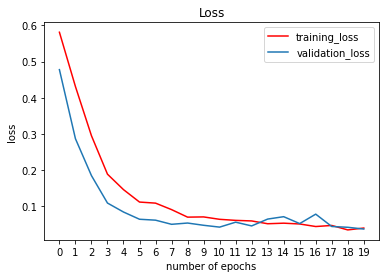

In [11]:
plt.title('Loss')
plt.xlabel('number of epochs')
plt.xticks(np.arange(0,epochs))
plt.ylabel('loss')
plt.plot(np.arange(0, epochs), history.history['loss'],'r', label='training_loss')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='validation_loss')
plt.legend(loc='best')
plt.show()

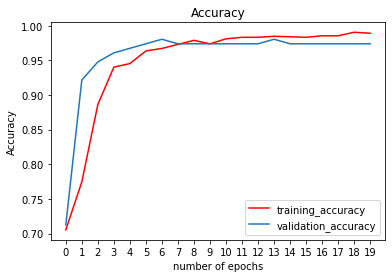

In [14]:
plt.title('Accuracy')
plt.xlabel('number of epochs')
plt.xticks(np.arange(0, epochs))
plt.ylabel('Accuracy')
plt.plot(np.arange(0, epochs), history.history['accuracy'],'r',label = 'training_accuracy')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'],label='validation_accuracy')
plt.legend(loc='best')
plt.show()

# we see that we coud've stopped learning earlier, at 12th epoch

In [20]:
from tensorflow.keras.models import load_model

In [21]:
model_path = 'covid19_classifier.h5'

In [22]:
model.save(model_path)

In [23]:
reloaded_model = load_model(model_path)

In [24]:
reloaded_model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 100, 100, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Activation',
   'config': {'name': 'activation',
    'trainable': True,
    'dtype': 'float32',
    'activation': 'relu'}},
  {'c

In [34]:
train_scores = reloaded_model.evaluate(X_train,y_train)
print('Train loss: ', train_scores[0])
print('Test loss: ', train_scores[1])

48/48 [==============================] - 3s 72ms/step - loss: 0.0209 - accuracy: 0.9928
Train loss:  0.020927369594573975
Test loss:  0.9927821755409241


In [35]:
test_scores = reloaded_model.evaluate(X_test, y_test)
print('Test loss: ', test_scores[0])
print('Test accuracy: ', test_scores[1])

12/12 [==============================] - 1s 72ms/step - loss: 0.0348 - accuracy: 0.9843
Test loss:  0.0347885899245739
Test accuracy:  0.9842519760131836
